Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)
# so that we have the same results every time

Data

In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


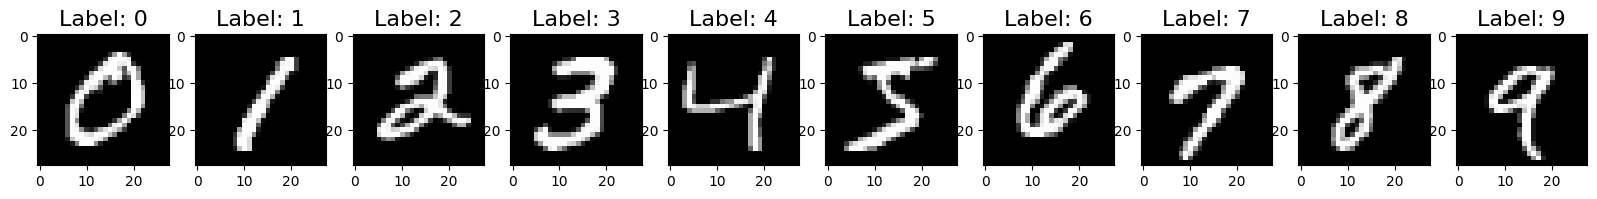

In [4]:
# visualizing examples

num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
    sample = X_train[y_train == i][0]   # take the first example where the i appears
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title("Label: {}".format(i), fontsize=16)

In [5]:
for i in range(10):
    print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [6]:
# one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
for i in range(10):
    print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


Prepare Data

In [8]:
# Normalize Data(keeping it in a certain range(0-1))
X_train = X_train / 255.0
X_test = X_test / 255.0

In [9]:
# reshape data
X_train = X_train.reshape(X_train.shape[0], -1)   # -1 will put 28 by 28 in one dimension
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape

(60000, 784)

Create Model - Fully Connected Neural Network

In [10]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


Train

In [11]:
batch_size = 512
epochs=10
model.fit(x=X_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
118/118 [==============================] - 1s 4ms/step - loss: 0.6106 - accuracy: 0.8238
Epoch 2/10
118/118 [==============================] - 0s 4ms/step - loss: 0.2232 - accuracy: 0.9353
Epoch 3/10
118/118 [==============================] - 0s 4ms/step - loss: 0.1627 - accuracy: 0.9524
Epoch 4/10
118/118 [==============================] - 0s 4ms/step - loss: 0.1263 - accuracy: 0.9625
Epoch 5/10
118/118 [==============================] - 1s 5ms/step - loss: 0.1046 - accuracy: 0.9686
Epoch 6/10
118/118 [==============================] - 1s 6ms/step - loss: 0.0890 - accuracy: 0.9735
Epoch 7/10
118/118 [==============================] - 1s 6ms/step - loss: 0.0766 - accuracy: 0.9770
Epoch 8/10
118/118 [==============================] - 1s 6ms/step - loss: 0.0655 - accuracy: 0.9800
Epoch 9/10
118/118 [==============================] - 1s 6ms/step - loss: 0.0585 - accuracy: 0.9822
Epoch 10/10
118/118 [==============================] - 1s 6ms/step - loss: 0.0519 - accuracy: 0.9845

Evaluation

In [12]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 1ms/step - loss: 0.0690 - accuracy: 0.9787
Test Loss: 0.06903693825006485, Test Accuracy: 0.9786999821662903


In [13]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print("=================================")
print(y_pred_classes)

313/313 [==============================] - 0s 1ms/step
[[2.0449256e-06 1.4046863e-06 1.1700462e-04 ... 9.9887520e-01
  4.1032058e-06 1.2245006e-05]
 [1.8429633e-06 1.6162047e-04 9.9820125e-01 ... 2.3611221e-07
  2.1551286e-05 3.4833045e-09]
 [7.2500995e-07 9.9896359e-01 5.3941043e-05 ... 6.6709059e-04
  3.7202732e-05 1.0739915e-06]
 ...
 [3.8664355e-10 3.5971925e-09 1.1337176e-09 ... 1.2451429e-05
  4.4133452e-07 3.5414676e-05]
 [1.1521592e-08 8.5658618e-09 3.2878633e-10 ... 3.2043427e-08
  1.4002034e-06 2.6044200e-09]
 [3.5775267e-07 1.8053554e-09 3.7544343e-08 ... 4.5063775e-12
  1.3586979e-08 5.8720745e-10]]
[7 2 1 ... 4 5 6]


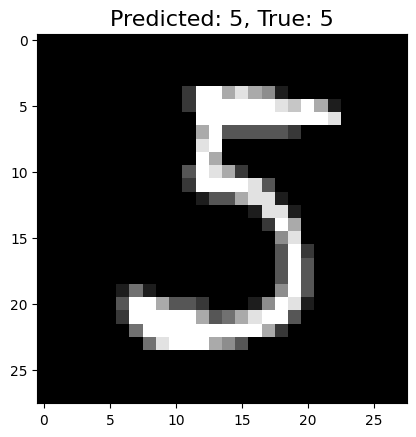

In [25]:
random_idx = np.random.choice(len(X_test))
X_sample = X_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(X_sample.reshape(28, 28), cmap='gray')

Confusion Matrix

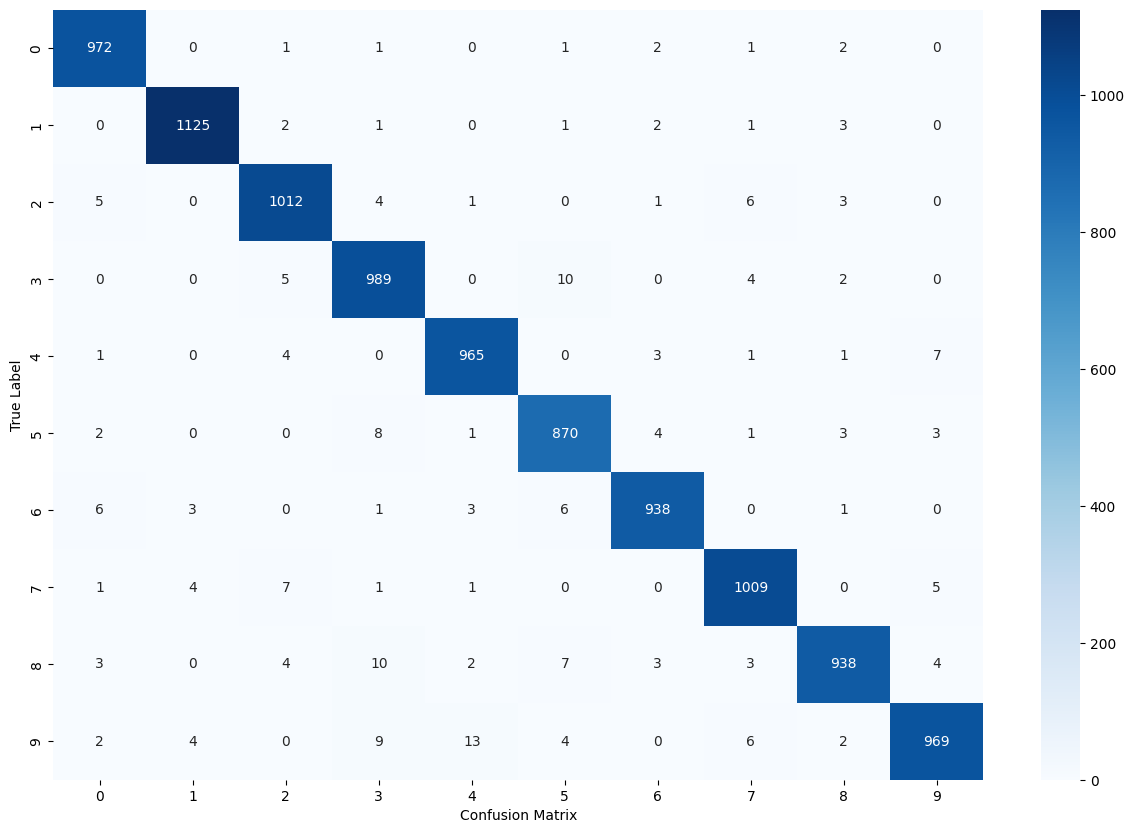

In [18]:
# To show the accuracy of the model
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_ylabel("True Label")
ax.set_xlabel("Confusion Matrix");